# Import Modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from src.svm import *
from src.trainer import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load the Dataset

In [2]:
train_data, test_data=get_dataset()
print(f'training data size: {len(train_data)}')
print(f'testing data size: {len(test_data)}')

Using custom data configuration default-data_dir=..%2Fdatasets
Found cached dataset mnist (/home/john/.cache/huggingface/datasets/mnist/default-data_dir=..%2Fdatasets/0.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

training data size: 3750
testing data size: 625


# Train a Model

We train our model on the loss function
$$
\mathcal{L(\theta)}=\lambda R_2(\theta)+\frac{1}{N}\sum\limits_1^N \max(0, 1-y_if(x))
$$
The notes say to use the regularizer $\lambda$ to scale the hinge loss but it makes more sense to use it to scale the regularization term.

In [3]:
model, history = train(num_epochs=15)

Using custom data configuration default-data_dir=..%2Fdatasets
Found cached dataset mnist (/home/john/.cache/huggingface/datasets/mnist/default-data_dir=..%2Fdatasets/0.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|                                                                                                                                                        | 0/225 [00:00<?, ?it/s]/home/john/anaconda3/envs/notebooks/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)
100%|█████████████████████████████████████████████████████████████████| 225/225 [09:13<00:00,  2.46s/it, train_loss=5.39, test_loss=6.02, train_acc=0.777, test_acc=0.788, ||w||=0.7]


# Plot Data

Here we plot the loss, accuracy and $||w_t||$ over time. The blue line is for the training set and the orange line is for the test set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.01, 'iteration number')

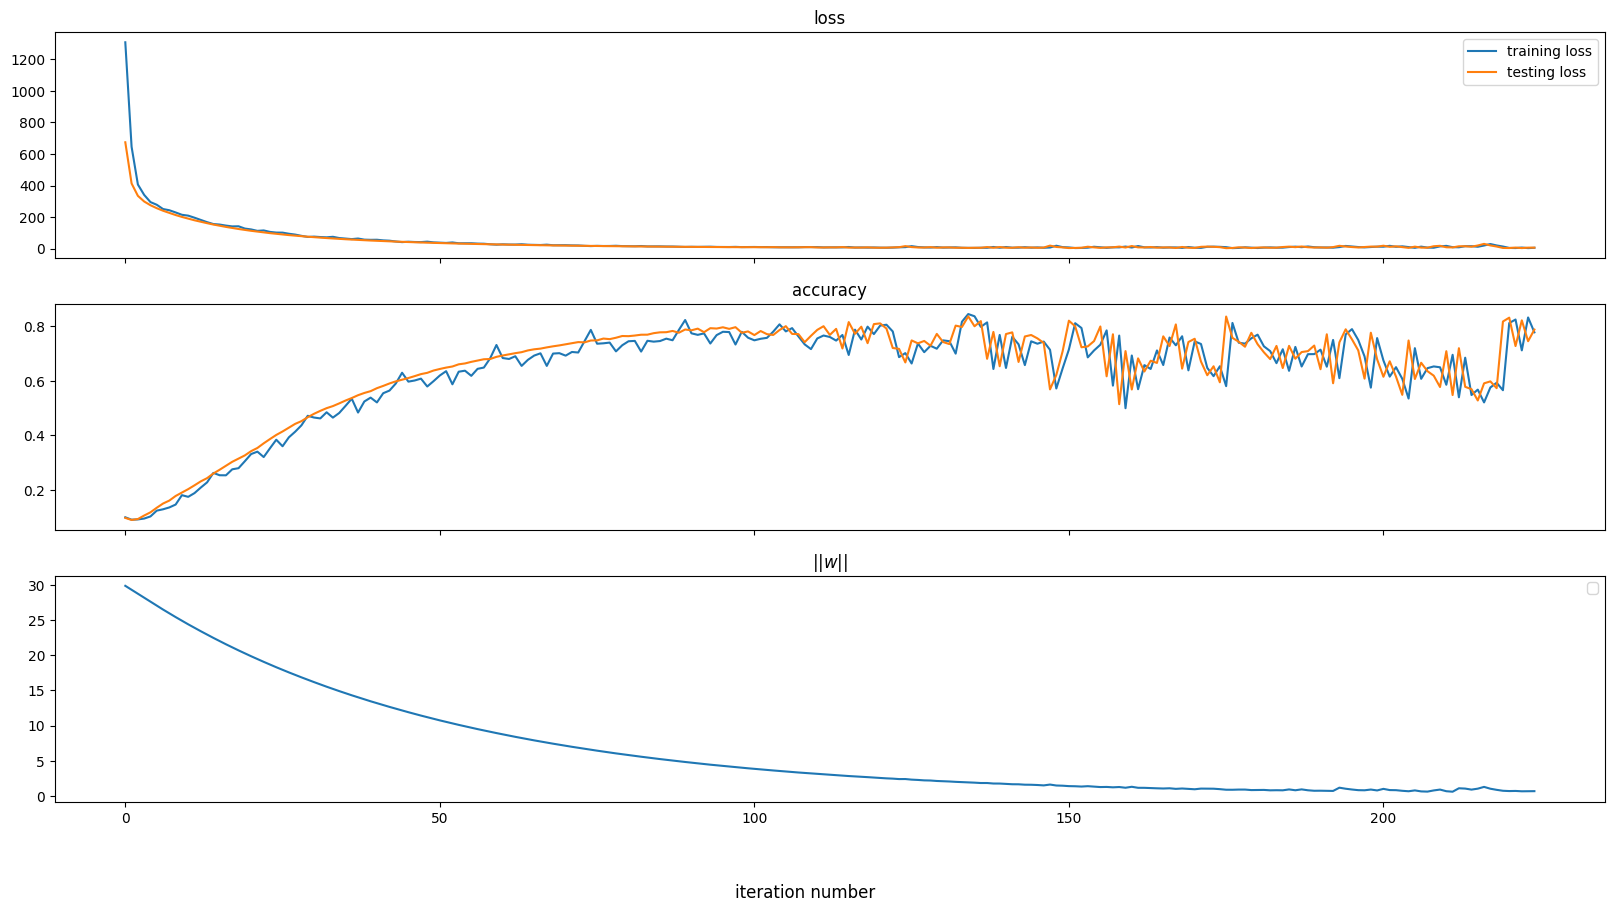

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]

# get subplots
fig, ax = plt.subplots(3, 1, sharex=True)

x=len(history['train_loss'])
xi=range(x)

# plot loss
ax[0].plot(xi, history['train_loss'], label='training loss')
ax[0].plot(xi, history['test_loss'], label='testing loss')
ax[0].legend(loc='upper right')

ax[0].set_title('loss')

# plot accuracy
ax[1].plot(xi, history['train_acc'], label='training acc')
ax[1].plot(xi, history['test_acc'], label='testing acc')

ax[1].set_title('accuracy')

# plot l2 norm of weights\
norm_w=np.array([np.linalg.norm(w, ord=2) for w in history['w']])
ax[2].plot(xi, norm_w)

ax[2].set_title(r'$||w||$')

plt.legend()
fig.supxlabel('iteration number')

# Visualize the Weights

Here we can clip off the bias and reshape the weights to create an image. You can see that the weight visualizations take the shape of their respective numbers

<Figure size 2000x1000 with 0 Axes>

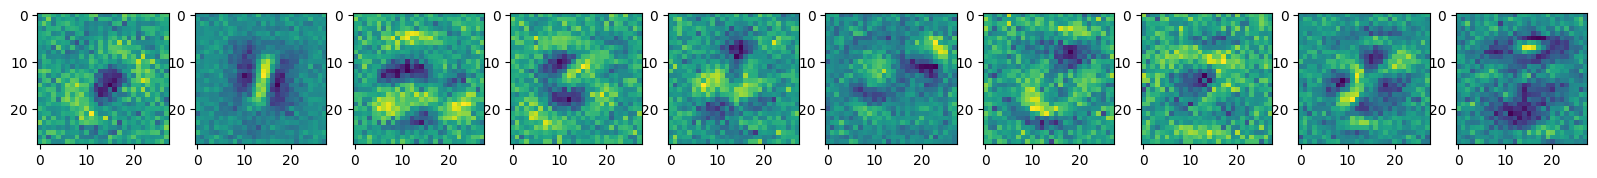

In [5]:
# use this to visualize the weights of the model 
def vis_weights(weight_history,num_samples=1, shape=(28,28)):
    x=np.linspace(0, len(weight_history)-1, num=num_samples, dtype=np.int64)
    plt.subplots_adjust(wspace=0, hspace=5)
    D, C=model.w.shape
    fig=plt.figure()
    samples=[weight_history[xi] for xi in x]
    n=1
    
    rows=len(samples)
    for i, weights in enumerate(samples):
        for j, row in enumerate(weights.T):
            ax = fig.add_subplot(rows, C, n)
            plt.imshow(row[:-1].reshape(shape))
            n+=1
        
vis_weights([model.w])

# Now Let's see how they look over time

The function `vis_weights` generates an image of how the weights during training. Changing `num_samples` increases the amount of samples to draw from the history. 

The samples are evenly spaced.

<Figure size 1000x2000 with 0 Axes>

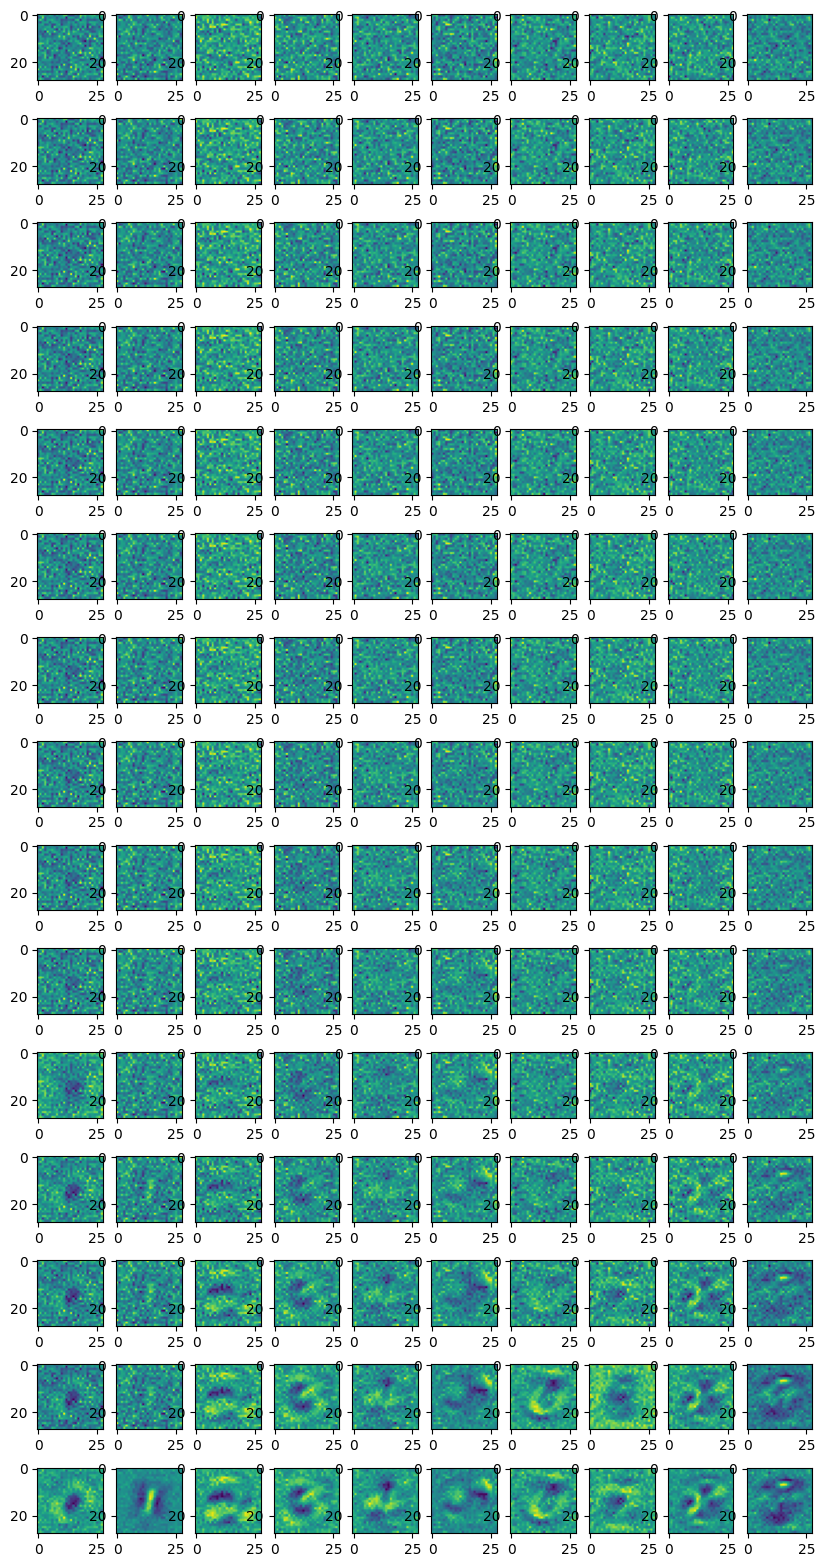

In [6]:
plt.rcParams['figure.figsize'] = [10, 20]
vis_weights(history['w'], num_samples=15)